In [1]:
import pandas as pd
from pandas import json_normalize
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

df_one = pd.read_json("../src/scripts/square-grid-geojson-correct.json")
df_one['grid1'] = 'grid1'
df_one = df_one.pivot(index="grid1",columns="key",values="value").reset_index().add_prefix('correct_grid_one_')
df_one.rename(columns={list(df_one)[0]:'grid1'}, inplace=True)

df_second = pd.read_json("../src/scripts/square-grid-geojson-second-correct.json")
df_second['grid2'] = 'grid2'
df_second = df_second.pivot(index="grid2",columns="key",values="value").reset_index().add_prefix('correct_grid_two_')
df_second.rename(columns={list(df_second)[0]:'grid2'}, inplace=True)

df_third = pd.read_json("../src/scripts/square-grid-geojson-third-correct.json")
df_third['grid3'] = 'grid3'
df_third = df_third.pivot(index="grid3",columns="key",values="value").reset_index().add_prefix('correct_grid_three_')
df_third.rename(columns={list(df_third)[0]:'grid3'}, inplace=True)

df = pd.read_csv("data/change-study-data-normalized.csv")
df = df.groupby(['uuid', 'category', 'data']).first().reset_index()
df = df.pivot_table(index=['uuid'],columns=['category'],values=['data'], aggfunc='first')
df.to_csv('data/cleaned_normalized_data_temp.csv')
df = pd.read_csv("data/cleaned_normalized_data_temp.csv")
df.iloc[0]
df.columns = df.iloc[0]
df = df[2:]
df['uuid'] = df['category']
df = df.dropna(subset=['gridanswers'])
df['index'] = np.arange(len(df))

#grid answers
dictValuesDF = df['gridanswers'].apply(json.loads)
dictValuesDFList = list(dictValuesDF)
data = dictValuesDFList
sdf = pd.Series(data, name='gridanswers').to_frame()
sdf['index'] = np.arange(len(sdf))
sdf = pd.DataFrame(dict(
    index=sdf.index.values.repeat(sdf['gridanswers'].str.len()),
)).join(pd.DataFrame(sdf['gridanswers'].sum()))
sdf['value'] = np.where(sdf['value'] > 0, 1, 0)
sdf = sdf.pivot(index="index",columns="key",values="value").reset_index().add_prefix('submitted_grid_')
sdf.rename(columns={list(sdf)[0]:'index'}, inplace=True)
df = df.join(sdf,on='index',how='left', rsuffix='_right')

df['grid1'] = 'grid1'
df['grid2'] = 'grid2'
df['grid3'] = 'grid3'

df = pd.merge(df, df_one, left_on="grid1", right_on="grid1", how="left", validate="m:1")
df = pd.merge(df, df_second, left_on="grid2", right_on="grid2", how="left", validate="m:1")
df = pd.merge(df, df_third, left_on="grid3", right_on="grid3", how="left", validate="m:1")

# df['map-version'] = np.where(df['map-version']==,0,df['map-version'])
values = {'map-version': 999}
df = df.fillna(values)
df['map-version'] = df['map-version'].astype(int)

df['iscorrect_grid_box_01'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-1'] == df['correct_grid_one_grid-box-1'], np.where(df['map-version']==1, df['submitted_grid_grid-box-1'] == df['correct_grid_two_grid-box-1'], np.where(df['map-version']==2, df['submitted_grid_grid-box-1'] == df['correct_grid_three_grid-box-1'], '')))
df['iscorrect_grid_box_02'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-2'] == df['correct_grid_one_grid-box-2'], np.where(df['map-version']==1, df['submitted_grid_grid-box-2'] == df['correct_grid_two_grid-box-2'], np.where(df['map-version']==2, df['submitted_grid_grid-box-2'] == df['correct_grid_three_grid-box-2'], '')))
df['iscorrect_grid_box_03'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-3'] == df['correct_grid_one_grid-box-3'], np.where(df['map-version']==1, df['submitted_grid_grid-box-3'] == df['correct_grid_two_grid-box-3'], np.where(df['map-version']==2, df['submitted_grid_grid-box-3'] == df['correct_grid_three_grid-box-3'], '')))
df['iscorrect_grid_box_04'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-4'] == df['correct_grid_one_grid-box-4'], np.where(df['map-version']==1, df['submitted_grid_grid-box-4'] == df['correct_grid_two_grid-box-4'], np.where(df['map-version']==2, df['submitted_grid_grid-box-4'] == df['correct_grid_three_grid-box-4'], '')))
df['iscorrect_grid_box_05'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-5'] == df['correct_grid_one_grid-box-5'], np.where(df['map-version']==1, df['submitted_grid_grid-box-5'] == df['correct_grid_two_grid-box-5'], np.where(df['map-version']==2, df['submitted_grid_grid-box-5'] == df['correct_grid_three_grid-box-5'], '')))
df['iscorrect_grid_box_06'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-6'] == df['correct_grid_one_grid-box-6'], np.where(df['map-version']==1, df['submitted_grid_grid-box-6'] == df['correct_grid_two_grid-box-6'], np.where(df['map-version']==2, df['submitted_grid_grid-box-6'] == df['correct_grid_three_grid-box-6'], '')))
df['iscorrect_grid_box_07'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-7'] == df['correct_grid_one_grid-box-7'], np.where(df['map-version']==1, df['submitted_grid_grid-box-7'] == df['correct_grid_two_grid-box-7'], np.where(df['map-version']==2, df['submitted_grid_grid-box-7'] == df['correct_grid_three_grid-box-7'], '')))
df['iscorrect_grid_box_08'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-8'] == df['correct_grid_one_grid-box-8'], np.where(df['map-version']==1, df['submitted_grid_grid-box-8'] == df['correct_grid_two_grid-box-8'], np.where(df['map-version']==2, df['submitted_grid_grid-box-8'] == df['correct_grid_three_grid-box-8'], '')))
df['iscorrect_grid_box_09'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-9'] == df['correct_grid_one_grid-box-9'], np.where(df['map-version']==1, df['submitted_grid_grid-box-9'] == df['correct_grid_two_grid-box-9'], np.where(df['map-version']==2, df['submitted_grid_grid-box-9'] == df['correct_grid_three_grid-box-9'], '')))

df['iscorrect_grid_box_10'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-10'] == df['correct_grid_one_grid-box-10'], np.where(df['map-version']==1, df['submitted_grid_grid-box-10'] == df['correct_grid_two_grid-box-10'], np.where(df['map-version']==2, df['submitted_grid_grid-box-10'] == df['correct_grid_three_grid-box-10'], '')))
df['iscorrect_grid_box_11'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-11'] == df['correct_grid_one_grid-box-11'], np.where(df['map-version']==1, df['submitted_grid_grid-box-11'] == df['correct_grid_two_grid-box-11'], np.where(df['map-version']==2, df['submitted_grid_grid-box-11'] == df['correct_grid_three_grid-box-11'], '')))
df['iscorrect_grid_box_12'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-12'] == df['correct_grid_one_grid-box-12'], np.where(df['map-version']==1, df['submitted_grid_grid-box-12'] == df['correct_grid_two_grid-box-12'], np.where(df['map-version']==2, df['submitted_grid_grid-box-12'] == df['correct_grid_three_grid-box-12'], '')))
df['iscorrect_grid_box_13'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-13'] == df['correct_grid_one_grid-box-13'], np.where(df['map-version']==1, df['submitted_grid_grid-box-13'] == df['correct_grid_two_grid-box-13'], np.where(df['map-version']==2, df['submitted_grid_grid-box-13'] == df['correct_grid_three_grid-box-13'], '')))
df['iscorrect_grid_box_14'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-14'] == df['correct_grid_one_grid-box-14'], np.where(df['map-version']==1, df['submitted_grid_grid-box-14'] == df['correct_grid_two_grid-box-14'], np.where(df['map-version']==2, df['submitted_grid_grid-box-14'] == df['correct_grid_three_grid-box-14'], '')))
df['iscorrect_grid_box_15'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-15'] == df['correct_grid_one_grid-box-15'], np.where(df['map-version']==1, df['submitted_grid_grid-box-15'] == df['correct_grid_two_grid-box-15'], np.where(df['map-version']==2, df['submitted_grid_grid-box-15'] == df['correct_grid_three_grid-box-15'], '')))
df['iscorrect_grid_box_16'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-16'] == df['correct_grid_one_grid-box-16'], np.where(df['map-version']==1, df['submitted_grid_grid-box-16'] == df['correct_grid_two_grid-box-16'], np.where(df['map-version']==2, df['submitted_grid_grid-box-16'] == df['correct_grid_three_grid-box-16'], '')))
df['iscorrect_grid_box_17'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-17'] == df['correct_grid_one_grid-box-17'], np.where(df['map-version']==1, df['submitted_grid_grid-box-17'] == df['correct_grid_two_grid-box-17'], np.where(df['map-version']==2, df['submitted_grid_grid-box-17'] == df['correct_grid_three_grid-box-17'], '')))
df['iscorrect_grid_box_18'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-18'] == df['correct_grid_one_grid-box-18'], np.where(df['map-version']==1, df['submitted_grid_grid-box-18'] == df['correct_grid_two_grid-box-18'], np.where(df['map-version']==2, df['submitted_grid_grid-box-18'] == df['correct_grid_three_grid-box-18'], '')))
df['iscorrect_grid_box_19'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-19'] == df['correct_grid_one_grid-box-19'], np.where(df['map-version']==1, df['submitted_grid_grid-box-19'] == df['correct_grid_two_grid-box-19'], np.where(df['map-version']==2, df['submitted_grid_grid-box-19'] == df['correct_grid_three_grid-box-19'], '')))

df['iscorrect_grid_box_20'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-20'] == df['correct_grid_one_grid-box-20'], np.where(df['map-version']==1, df['submitted_grid_grid-box-20'] == df['correct_grid_two_grid-box-20'], np.where(df['map-version']==2, df['submitted_grid_grid-box-20'] == df['correct_grid_three_grid-box-20'], '')))
df['iscorrect_grid_box_21'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-21'] == df['correct_grid_one_grid-box-21'], np.where(df['map-version']==1, df['submitted_grid_grid-box-21'] == df['correct_grid_two_grid-box-21'], np.where(df['map-version']==2, df['submitted_grid_grid-box-21'] == df['correct_grid_three_grid-box-21'], '')))
df['iscorrect_grid_box_22'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-22'] == df['correct_grid_one_grid-box-22'], np.where(df['map-version']==1, df['submitted_grid_grid-box-22'] == df['correct_grid_two_grid-box-22'], np.where(df['map-version']==2, df['submitted_grid_grid-box-22'] == df['correct_grid_three_grid-box-22'], '')))
df['iscorrect_grid_box_23'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-23'] == df['correct_grid_one_grid-box-23'], np.where(df['map-version']==1, df['submitted_grid_grid-box-23'] == df['correct_grid_two_grid-box-23'], np.where(df['map-version']==2, df['submitted_grid_grid-box-23'] == df['correct_grid_three_grid-box-23'], '')))
df['iscorrect_grid_box_24'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-24'] == df['correct_grid_one_grid-box-24'], np.where(df['map-version']==1, df['submitted_grid_grid-box-24'] == df['correct_grid_two_grid-box-24'], np.where(df['map-version']==2, df['submitted_grid_grid-box-24'] == df['correct_grid_three_grid-box-24'], '')))
df['iscorrect_grid_box_25'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-25'] == df['correct_grid_one_grid-box-25'], np.where(df['map-version']==1, df['submitted_grid_grid-box-25'] == df['correct_grid_two_grid-box-25'], np.where(df['map-version']==2, df['submitted_grid_grid-box-25'] == df['correct_grid_three_grid-box-25'], '')))
df['iscorrect_grid_box_26'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-26'] == df['correct_grid_one_grid-box-26'], np.where(df['map-version']==1, df['submitted_grid_grid-box-26'] == df['correct_grid_two_grid-box-26'], np.where(df['map-version']==2, df['submitted_grid_grid-box-26'] == df['correct_grid_three_grid-box-26'], '')))
df['iscorrect_grid_box_27'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-27'] == df['correct_grid_one_grid-box-27'], np.where(df['map-version']==1, df['submitted_grid_grid-box-27'] == df['correct_grid_two_grid-box-27'], np.where(df['map-version']==2, df['submitted_grid_grid-box-27'] == df['correct_grid_three_grid-box-27'], '')))
df['iscorrect_grid_box_28'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-28'] == df['correct_grid_one_grid-box-28'], np.where(df['map-version']==1, df['submitted_grid_grid-box-28'] == df['correct_grid_two_grid-box-28'], np.where(df['map-version']==2, df['submitted_grid_grid-box-28'] == df['correct_grid_three_grid-box-28'], '')))
df['iscorrect_grid_box_29'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-29'] == df['correct_grid_one_grid-box-29'], np.where(df['map-version']==1, df['submitted_grid_grid-box-29'] == df['correct_grid_two_grid-box-29'], np.where(df['map-version']==2, df['submitted_grid_grid-box-29'] == df['correct_grid_three_grid-box-29'], '')))

df['iscorrect_grid_box_30'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-30'] == df['correct_grid_one_grid-box-30'], np.where(df['map-version']==1, df['submitted_grid_grid-box-30'] == df['correct_grid_two_grid-box-30'], np.where(df['map-version']==2, df['submitted_grid_grid-box-30'] == df['correct_grid_three_grid-box-30'], '')))
df['iscorrect_grid_box_31'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-31'] == df['correct_grid_one_grid-box-31'], np.where(df['map-version']==1, df['submitted_grid_grid-box-31'] == df['correct_grid_two_grid-box-31'], np.where(df['map-version']==2, df['submitted_grid_grid-box-31'] == df['correct_grid_three_grid-box-31'], '')))
df['iscorrect_grid_box_32'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-32'] == df['correct_grid_one_grid-box-32'], np.where(df['map-version']==1, df['submitted_grid_grid-box-32'] == df['correct_grid_two_grid-box-32'], np.where(df['map-version']==2, df['submitted_grid_grid-box-32'] == df['correct_grid_three_grid-box-32'], '')))
df['iscorrect_grid_box_33'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-33'] == df['correct_grid_one_grid-box-33'], np.where(df['map-version']==1, df['submitted_grid_grid-box-33'] == df['correct_grid_two_grid-box-33'], np.where(df['map-version']==2, df['submitted_grid_grid-box-33'] == df['correct_grid_three_grid-box-33'], '')))
df['iscorrect_grid_box_34'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-34'] == df['correct_grid_one_grid-box-34'], np.where(df['map-version']==1, df['submitted_grid_grid-box-34'] == df['correct_grid_two_grid-box-34'], np.where(df['map-version']==2, df['submitted_grid_grid-box-34'] == df['correct_grid_three_grid-box-34'], '')))
df['iscorrect_grid_box_35'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-35'] == df['correct_grid_one_grid-box-35'], np.where(df['map-version']==1, df['submitted_grid_grid-box-35'] == df['correct_grid_two_grid-box-35'], np.where(df['map-version']==2, df['submitted_grid_grid-box-35'] == df['correct_grid_three_grid-box-35'], '')))
df['iscorrect_grid_box_36'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-36'] == df['correct_grid_one_grid-box-36'], np.where(df['map-version']==1, df['submitted_grid_grid-box-36'] == df['correct_grid_two_grid-box-36'], np.where(df['map-version']==2, df['submitted_grid_grid-box-36'] == df['correct_grid_three_grid-box-36'], '')))
df['iscorrect_grid_box_37'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-37'] == df['correct_grid_one_grid-box-37'], np.where(df['map-version']==1, df['submitted_grid_grid-box-37'] == df['correct_grid_two_grid-box-37'], np.where(df['map-version']==2, df['submitted_grid_grid-box-37'] == df['correct_grid_three_grid-box-37'], '')))
df['iscorrect_grid_box_38'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-38'] == df['correct_grid_one_grid-box-38'], np.where(df['map-version']==1, df['submitted_grid_grid-box-38'] == df['correct_grid_two_grid-box-38'], np.where(df['map-version']==2, df['submitted_grid_grid-box-38'] == df['correct_grid_three_grid-box-38'], '')))
df['iscorrect_grid_box_39'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-39'] == df['correct_grid_one_grid-box-39'], np.where(df['map-version']==1, df['submitted_grid_grid-box-39'] == df['correct_grid_two_grid-box-39'], np.where(df['map-version']==2, df['submitted_grid_grid-box-39'] == df['correct_grid_three_grid-box-39'], '')))

df['iscorrect_grid_box_40'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-40'] == df['correct_grid_one_grid-box-40'], np.where(df['map-version']==1, df['submitted_grid_grid-box-40'] == df['correct_grid_two_grid-box-40'], np.where(df['map-version']==2, df['submitted_grid_grid-box-40'] == df['correct_grid_three_grid-box-40'], '')))
df['iscorrect_grid_box_41'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-41'] == df['correct_grid_one_grid-box-41'], np.where(df['map-version']==1, df['submitted_grid_grid-box-41'] == df['correct_grid_two_grid-box-41'], np.where(df['map-version']==2, df['submitted_grid_grid-box-41'] == df['correct_grid_three_grid-box-41'], '')))
df['iscorrect_grid_box_42'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-42'] == df['correct_grid_one_grid-box-42'], np.where(df['map-version']==1, df['submitted_grid_grid-box-42'] == df['correct_grid_two_grid-box-42'], np.where(df['map-version']==2, df['submitted_grid_grid-box-42'] == df['correct_grid_three_grid-box-42'], '')))

del  df['correct_grid_one_grid-box-1']
del  df['correct_grid_two_grid-box-1']
del  df['correct_grid_three_grid-box-1']

del  df['correct_grid_one_grid-box-2']
del  df['correct_grid_two_grid-box-2']
del  df['correct_grid_three_grid-box-2']

del  df['correct_grid_one_grid-box-3']
del  df['correct_grid_two_grid-box-3']
del  df['correct_grid_three_grid-box-3']

del  df['correct_grid_one_grid-box-4']
del  df['correct_grid_two_grid-box-4']
del  df['correct_grid_three_grid-box-4']

del  df['correct_grid_one_grid-box-5']
del  df['correct_grid_two_grid-box-5']
del  df['correct_grid_three_grid-box-5']

del  df['correct_grid_one_grid-box-6']
del  df['correct_grid_two_grid-box-6']
del  df['correct_grid_three_grid-box-6']

del  df['correct_grid_one_grid-box-7']
del  df['correct_grid_two_grid-box-7']
del  df['correct_grid_three_grid-box-7']

del  df['correct_grid_one_grid-box-8']
del  df['correct_grid_two_grid-box-8']
del  df['correct_grid_three_grid-box-8']

del  df['correct_grid_one_grid-box-9']
del  df['correct_grid_two_grid-box-9']
del  df['correct_grid_three_grid-box-9']

del  df['correct_grid_one_grid-box-10']
del  df['correct_grid_two_grid-box-10']
del  df['correct_grid_three_grid-box-10']

del  df['correct_grid_one_grid-box-11']
del  df['correct_grid_two_grid-box-11']
del  df['correct_grid_three_grid-box-11']

del  df['correct_grid_one_grid-box-12']
del  df['correct_grid_two_grid-box-12']
del  df['correct_grid_three_grid-box-12']

del  df['correct_grid_one_grid-box-13']
del  df['correct_grid_two_grid-box-13']
del  df['correct_grid_three_grid-box-13']

del  df['correct_grid_one_grid-box-14']
del  df['correct_grid_two_grid-box-14']
del  df['correct_grid_three_grid-box-14']

del  df['correct_grid_one_grid-box-15']
del  df['correct_grid_two_grid-box-15']
del  df['correct_grid_three_grid-box-15']

del  df['correct_grid_one_grid-box-16']
del  df['correct_grid_two_grid-box-16']
del  df['correct_grid_three_grid-box-16']

del  df['correct_grid_one_grid-box-17']
del  df['correct_grid_two_grid-box-17']
del  df['correct_grid_three_grid-box-17']

del  df['correct_grid_one_grid-box-18']
del  df['correct_grid_two_grid-box-18']
del  df['correct_grid_three_grid-box-18']

del  df['correct_grid_one_grid-box-19']
del  df['correct_grid_two_grid-box-19']
del  df['correct_grid_three_grid-box-19']

del  df['correct_grid_one_grid-box-20']
del  df['correct_grid_two_grid-box-20']
del  df['correct_grid_three_grid-box-20']

del  df['correct_grid_one_grid-box-21']
del  df['correct_grid_two_grid-box-21']
del  df['correct_grid_three_grid-box-21']

del  df['correct_grid_one_grid-box-22']
del  df['correct_grid_two_grid-box-22']
del  df['correct_grid_three_grid-box-22']

del  df['correct_grid_one_grid-box-23']
del  df['correct_grid_two_grid-box-23']
del  df['correct_grid_three_grid-box-23']

del  df['correct_grid_one_grid-box-24']
del  df['correct_grid_two_grid-box-24']
del  df['correct_grid_three_grid-box-24']

del  df['correct_grid_one_grid-box-25']
del  df['correct_grid_two_grid-box-25']
del  df['correct_grid_three_grid-box-25']

del  df['correct_grid_one_grid-box-26']
del  df['correct_grid_two_grid-box-26']
del  df['correct_grid_three_grid-box-26']

del  df['correct_grid_one_grid-box-27']
del  df['correct_grid_two_grid-box-27']
del  df['correct_grid_three_grid-box-27']

del  df['correct_grid_one_grid-box-28']
del  df['correct_grid_two_grid-box-28']
del  df['correct_grid_three_grid-box-28']

del  df['correct_grid_one_grid-box-29']
del  df['correct_grid_two_grid-box-29']
del  df['correct_grid_three_grid-box-29']

del  df['correct_grid_one_grid-box-30']
del  df['correct_grid_two_grid-box-30']
del  df['correct_grid_three_grid-box-30']

del  df['correct_grid_one_grid-box-31']
del  df['correct_grid_two_grid-box-31']
del  df['correct_grid_three_grid-box-31']

del  df['correct_grid_one_grid-box-32']
del  df['correct_grid_two_grid-box-32']
del  df['correct_grid_three_grid-box-32']

del  df['correct_grid_one_grid-box-33']
del  df['correct_grid_two_grid-box-33']
del  df['correct_grid_three_grid-box-33']

del  df['correct_grid_one_grid-box-34']
del  df['correct_grid_two_grid-box-34']
del  df['correct_grid_three_grid-box-34']

del  df['correct_grid_one_grid-box-35']
del  df['correct_grid_two_grid-box-35']
del  df['correct_grid_three_grid-box-35']

del  df['correct_grid_one_grid-box-36']
del  df['correct_grid_two_grid-box-36']
del  df['correct_grid_three_grid-box-36']

del  df['correct_grid_one_grid-box-37']
del  df['correct_grid_two_grid-box-37']
del  df['correct_grid_three_grid-box-37']

del  df['correct_grid_one_grid-box-38']
del  df['correct_grid_two_grid-box-38']
del  df['correct_grid_three_grid-box-38']

del  df['correct_grid_one_grid-box-39']
del  df['correct_grid_two_grid-box-39']
del  df['correct_grid_three_grid-box-39']

del  df['correct_grid_one_grid-box-40']
del  df['correct_grid_two_grid-box-40']
del  df['correct_grid_three_grid-box-40']

del  df['correct_grid_one_grid-box-41']
del  df['correct_grid_two_grid-box-41']
del  df['correct_grid_three_grid-box-41']

del  df['correct_grid_one_grid-box-42']
del  df['correct_grid_two_grid-box-42']
del  df['correct_grid_three_grid-box-42']


del  df['submitted_grid_grid-box-0']
del  df['submitted_grid_grid-box-1']
del  df['submitted_grid_grid-box-2']
del  df['submitted_grid_grid-box-3']
del  df['submitted_grid_grid-box-4']
del  df['submitted_grid_grid-box-5']
del  df['submitted_grid_grid-box-6']
del  df['submitted_grid_grid-box-7']
del  df['submitted_grid_grid-box-8']
del  df['submitted_grid_grid-box-9']

del  df['submitted_grid_grid-box-10']
del  df['submitted_grid_grid-box-11']
del  df['submitted_grid_grid-box-12']
del  df['submitted_grid_grid-box-13']
del  df['submitted_grid_grid-box-14']
del  df['submitted_grid_grid-box-15']
del  df['submitted_grid_grid-box-16']
del  df['submitted_grid_grid-box-17']
del  df['submitted_grid_grid-box-18']
del  df['submitted_grid_grid-box-19']

del  df['submitted_grid_grid-box-20']
del  df['submitted_grid_grid-box-21']
del  df['submitted_grid_grid-box-22']
del  df['submitted_grid_grid-box-23']
del  df['submitted_grid_grid-box-24']
del  df['submitted_grid_grid-box-25']
del  df['submitted_grid_grid-box-26']
del  df['submitted_grid_grid-box-27']
del  df['submitted_grid_grid-box-28']
del  df['submitted_grid_grid-box-29']
                                     
del  df['submitted_grid_grid-box-30']
del  df['submitted_grid_grid-box-31']
del  df['submitted_grid_grid-box-32']
del  df['submitted_grid_grid-box-33']
del  df['submitted_grid_grid-box-34']
del  df['submitted_grid_grid-box-35']
del  df['submitted_grid_grid-box-36']
del  df['submitted_grid_grid-box-37']
del  df['submitted_grid_grid-box-38']
del  df['submitted_grid_grid-box-39']
                                                                          
del  df['submitted_grid_grid-box-40']
del  df['submitted_grid_grid-box-41']
del  df['submitted_grid_grid-box-42']


def parse(b):
    return b == "True"

df['percent-correct'] = ((parse(df['iscorrect_grid_box_01']).astype(int) + 
                     parse(df['iscorrect_grid_box_02']).astype(int) + 
                     parse(df['iscorrect_grid_box_03']).astype(int) + 
                     parse(df['iscorrect_grid_box_04']).astype(int) + 
                     parse(df['iscorrect_grid_box_05']).astype(int) + 
                     parse(df['iscorrect_grid_box_06']).astype(int) + 
                     parse(df['iscorrect_grid_box_07']).astype(int) + 
                     parse(df['iscorrect_grid_box_08']).astype(int) + 
                     parse(df['iscorrect_grid_box_09']).astype(int) + 
                     parse(df['iscorrect_grid_box_10']).astype(int) + 
                     parse(df['iscorrect_grid_box_11']).astype(int) + 
                     parse(df['iscorrect_grid_box_12']).astype(int) + 
                     parse(df['iscorrect_grid_box_13']).astype(int) + 
                     parse(df['iscorrect_grid_box_14']).astype(int) + 
                     parse(df['iscorrect_grid_box_15']).astype(int) + 
                     parse(df['iscorrect_grid_box_16']).astype(int) + 
                     parse(df['iscorrect_grid_box_17']).astype(int) + 
                     parse(df['iscorrect_grid_box_18']).astype(int) + 
                     parse(df['iscorrect_grid_box_19']).astype(int) + 
                     parse(df['iscorrect_grid_box_20']).astype(int) + 
                     parse(df['iscorrect_grid_box_21']).astype(int) + 
                     parse(df['iscorrect_grid_box_22']).astype(int) + 
                     parse(df['iscorrect_grid_box_23']).astype(int) + 
                     parse(df['iscorrect_grid_box_24']).astype(int) + 
                     parse(df['iscorrect_grid_box_25']).astype(int) + 
                     parse(df['iscorrect_grid_box_26']).astype(int) + 
                     parse(df['iscorrect_grid_box_27']).astype(int) + 
                     parse(df['iscorrect_grid_box_28']).astype(int) + 
                     parse(df['iscorrect_grid_box_29']).astype(int) + 
                     parse(df['iscorrect_grid_box_30']).astype(int) + 
                     parse(df['iscorrect_grid_box_31']).astype(int) + 
                     parse(df['iscorrect_grid_box_32']).astype(int) + 
                     parse(df['iscorrect_grid_box_33']).astype(int) + 
                     parse(df['iscorrect_grid_box_34']).astype(int) + 
                     parse(df['iscorrect_grid_box_35']).astype(int) + 
                     parse(df['iscorrect_grid_box_36']).astype(int) + 
                     parse(df['iscorrect_grid_box_37']).astype(int) + 
                     parse(df['iscorrect_grid_box_38']).astype(int) + 
                     parse(df['iscorrect_grid_box_39']).astype(int) + 
                     parse(df['iscorrect_grid_box_40']).astype(int) + 
                     parse(df['iscorrect_grid_box_41']).astype(int) + 
                     parse(df['iscorrect_grid_box_42']).astype(int))/42) * 100

del df['iscorrect_grid_box_01']
del df['iscorrect_grid_box_02']
del df['iscorrect_grid_box_03']
del df['iscorrect_grid_box_04']
del df['iscorrect_grid_box_05']
del df['iscorrect_grid_box_06']
del df['iscorrect_grid_box_07']
del df['iscorrect_grid_box_08']
del df['iscorrect_grid_box_09']
del df['iscorrect_grid_box_10']
del df['iscorrect_grid_box_11']
del df['iscorrect_grid_box_12']
del df['iscorrect_grid_box_13']
del df['iscorrect_grid_box_14']
del df['iscorrect_grid_box_15']
del df['iscorrect_grid_box_16']
del df['iscorrect_grid_box_17']
del df['iscorrect_grid_box_18']
del df['iscorrect_grid_box_19']
del df['iscorrect_grid_box_20']
del df['iscorrect_grid_box_21']
del df['iscorrect_grid_box_22']
del df['iscorrect_grid_box_23']
del df['iscorrect_grid_box_24']
del df['iscorrect_grid_box_25']
del df['iscorrect_grid_box_26']
del df['iscorrect_grid_box_27']
del df['iscorrect_grid_box_28']
del df['iscorrect_grid_box_29']
del df['iscorrect_grid_box_30']
del df['iscorrect_grid_box_31']
del df['iscorrect_grid_box_32']
del df['iscorrect_grid_box_33']
del df['iscorrect_grid_box_34']
del df['iscorrect_grid_box_35']
del df['iscorrect_grid_box_36']
del df['iscorrect_grid_box_37']
del df['iscorrect_grid_box_38']
del df['iscorrect_grid_box_39']
del df['iscorrect_grid_box_40']
del df['iscorrect_grid_box_41']
del df['iscorrect_grid_box_42']


df['time-taken-minutes']  = ( pd.to_datetime(df['gridanswers-time'].str.replace('T',' ').str.replace('Z','')) - pd.to_datetime(df['study-agreement-time'].str.replace('T',' ').str.replace('Z','')))/np.timedelta64(1,'m')

del df['grid1']
del df['grid2']
del df['grid3']
del df['category']
del df['campaign']
del df['grid-submited']
del df['gridanswers']
del df['is mobile']
# del df['map-version']
# del df['screen size']
del df['study started']
del df['gridanswers-time']
del df['study started time']
del df['study-agreement']
del df['study-completed']
# del df['study-question']
del df['susanswers']
del df['susanswers-submited']
del df['susanswers-time']
del df['study-agreement-time']
del df['index']
del df['undefined']
df = df.dropna()
df = df.drop_duplicates(subset='uuid', keep='first')
df = df.sort_values(by='uuid', ascending=False)
df.to_csv('data/cleaned_normalized_data-gridonly.csv')


df['study'] = df['study-question'].replace({'0': 'Animate', '1': 'Side by Side', '2': 'Slider'})
df['map'] = df['map-version'].replace({0: 'Party Rock Fire SWIR', 1: 'Landcover', 2: 'Lake Mead'})
df['study-question'] = df['study-question'].astype(int)

In [2]:
df['time-taken-minutes-log'] = np.log(df['time-taken-minutes'])
df['percent-correct-log'] = np.log(df['percent-correct'])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111fe2f50>]],
      dtype=object)

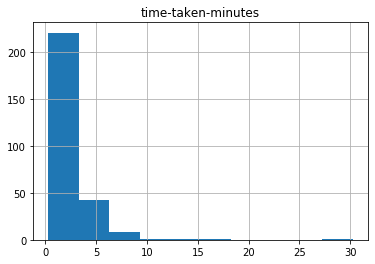

In [3]:
df = df.loc[df['time-taken-minutes'] < 1000]
df = df.loc[df['time-taken-minutes'] > 0]
df.hist('time-taken-minutes')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111fe2ed0>]],
      dtype=object)

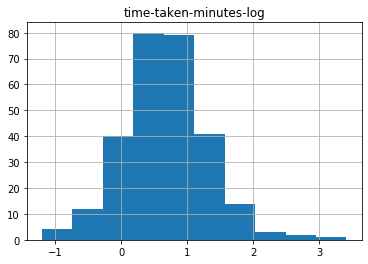

In [4]:
df['time-taken-minutes-log'] =  np.log(df['time-taken-minutes'])
df.hist('time-taken-minutes-log')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124f21050>]],
      dtype=object)

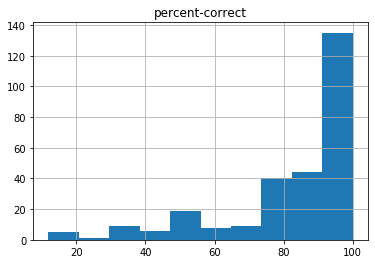

In [5]:
df.hist('percent-correct')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111fe2c50>]],
      dtype=object)

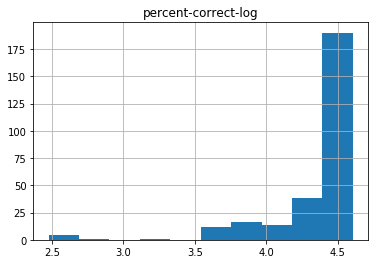

In [6]:
df['percent-correct-log'] = np.log(df['percent-correct'])
df.hist('percent-correct-log') 

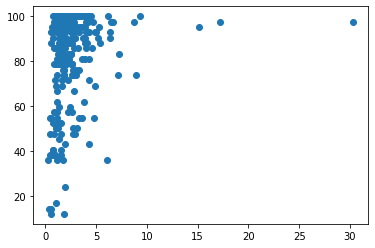

In [7]:
plt.scatter(df['time-taken-minutes'], df['percent-correct'])

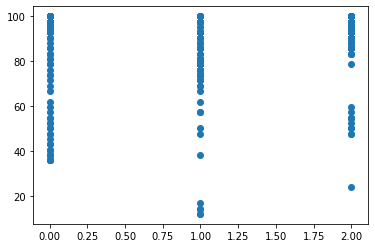

In [8]:
plt.scatter(df['map-version'], df['percent-correct'])

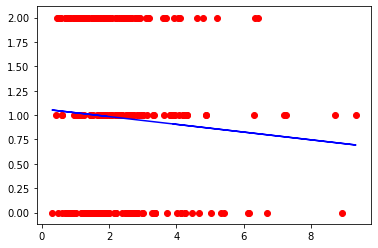

In [9]:
from sklearn.linear_model import LinearRegression
df = df.loc[df['time-taken-minutes'] <= 14]

# Create linear regression object
X = df[['time-taken-minutes']]
Y = df[['map-version']]

regressor = LinearRegression()
regressor.fit(X, Y)
plt.scatter(X, Y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')


In [10]:
import statsmodels.api as sm
model_Simple = sm.OLS(Y, X).fit()
model = sm.OLS(Y, sm.add_constant(X)).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            map-version   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.349
Date:                Mon, 09 Mar 2020   Prob (F-statistic):              0.246
Time:                        19:47:38   Log-Likelihood:                -338.48
No. Observations:                 273   AIC:                             681.0
Df Residuals:                     271   BIC:                             688.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.0636      0.095     11.224      0.000       0.877       1.250
time-taken-minutes    -0.0396      0.034     -1.162      0.246      -0.107       0.028
==============================================================================
Omnibus:                     2513.272   Durbin-Watson:                   2.195
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.979
Skew:                           0.032   Prob(JB):                     8.40e-07
Kurtosis:                       1.433   Cond. No.                         5.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

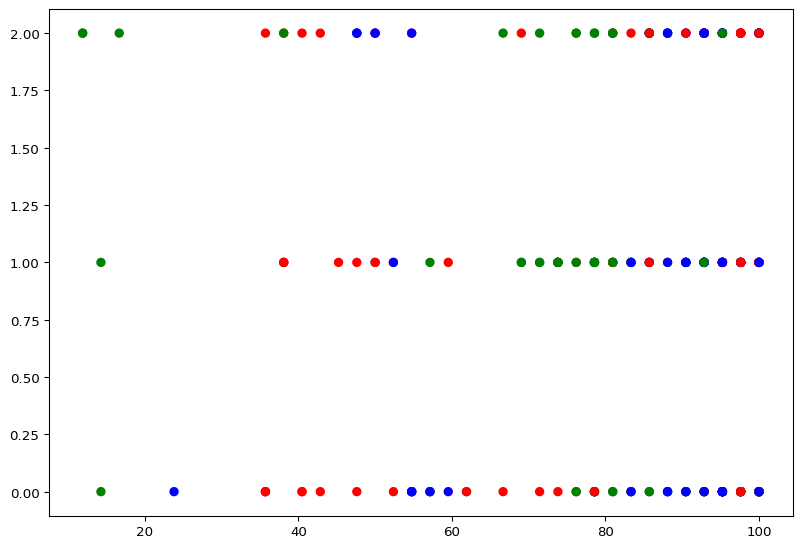

In [11]:
# # ax1 = 
# ax1 = df[df['study-question']=='0'].plot(kind='scatter', x='time-taken-minutes',y='percent-correct', color='blue',alpha=0.5, figsize=(10,7))
# ax2 = df[df['study-question']=='1'].plot(kind='scatter', x='time-taken-minutes',y='percent-correct', color='magenta',alpha=0.5, figsize=(10,7))
# df[df['study-question']=='2'].plot(kind='scatter', x='time-taken-minutes',y='percent-correct', color='red',alpha=0.5, figsize=(10,7), ax=ax1,ax2)
# # df[df['Gender']=='Female'].plot(kind='scatter', x='Height',y='Weight', color='magenta',alpha=0.5, figsize=(10,7),ax=ax1)
fig = plt.figure(figsize=(10, 7), dpi=96)
ax = fig.add_subplot(111)
colorsmap = {0:'red', 1:'green', 2:'blue'}
colorsstudy = {'0':'red', '1':'green', '2':'blue'}

# sns.lmplot('time-taken-minutes', 'percent-correct', data=df, hue='study-question', fit_reg=False)

# ax.scatter(df['percent-correct'], df['map-version'], c=df['map-version'].apply(lambda x: colorsmap[x]))
# ax.scatter(df['time-taken-minutes'], df['study-question'], c=df['study-question'].apply(lambda x: colorsstudy[x]))
ax.scatter(df['percent-correct'], df['study-question'], c=df['map-version'].apply(lambda x: colorsmap[x]))
# ax.scatter(df['percent-correct'], df['map-version'], c=df['study-question'].apply(lambda x: colorsstudy[x]))

# plt.figure(figsize=(10,7), dpi=96)
plt.show()

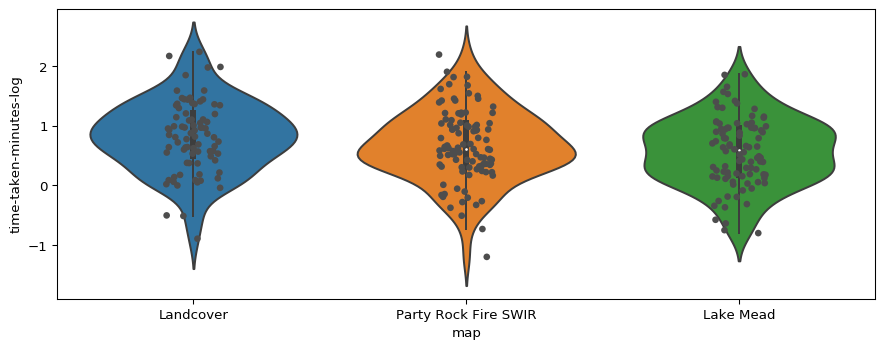

In [12]:
plt.figure(figsize=(11,4), dpi=96)
sns.violinplot(x='map',y='time-taken-minutes-log', data=df)
sns.stripplot(x='map',y='time-taken-minutes-log', color=".3", data=df)

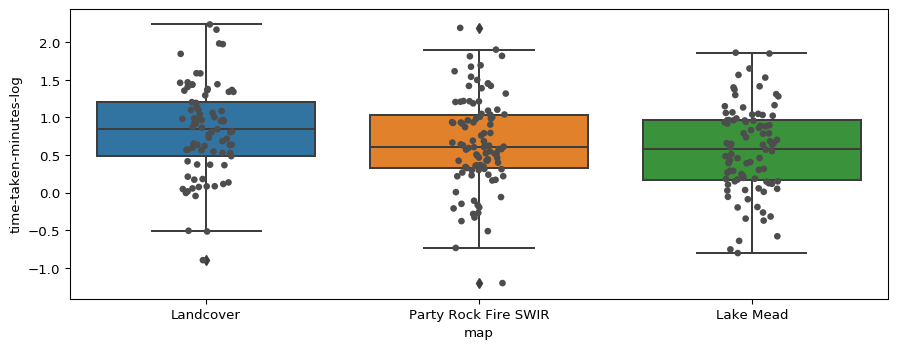

In [13]:
plt.figure(figsize=(11,4), dpi=96)
sns.boxplot(x='map',y='time-taken-minutes-log', data=df)
sns.stripplot(x='map',y='time-taken-minutes-log', color=".3", data=df)

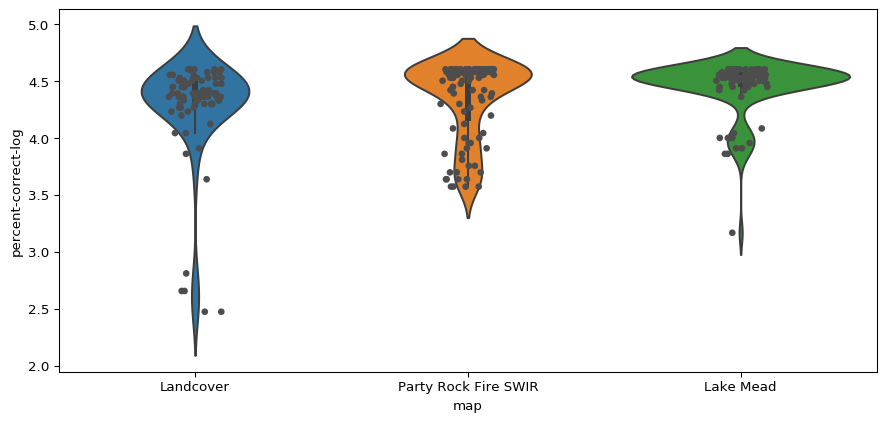

In [14]:
plt.figure(figsize=(11,5), dpi=96)
sns.violinplot(x='map',y='percent-correct-log', data=df)
sns.stripplot(x='map',y='percent-correct-log', color=".3", data=df)

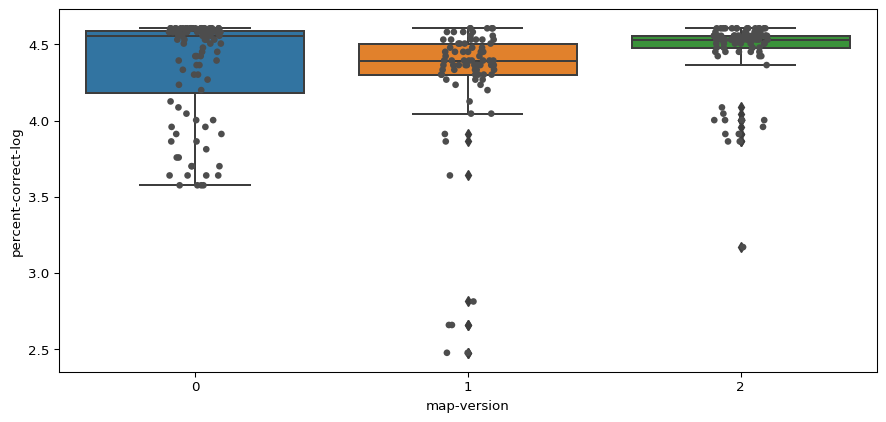

In [15]:
plt.figure(figsize=(11,5), dpi=96)
sns.boxplot(x='map-version',y='percent-correct-log', data=df)
sns.stripplot(x='map-version',y='percent-correct-log', color=".3", data=df)

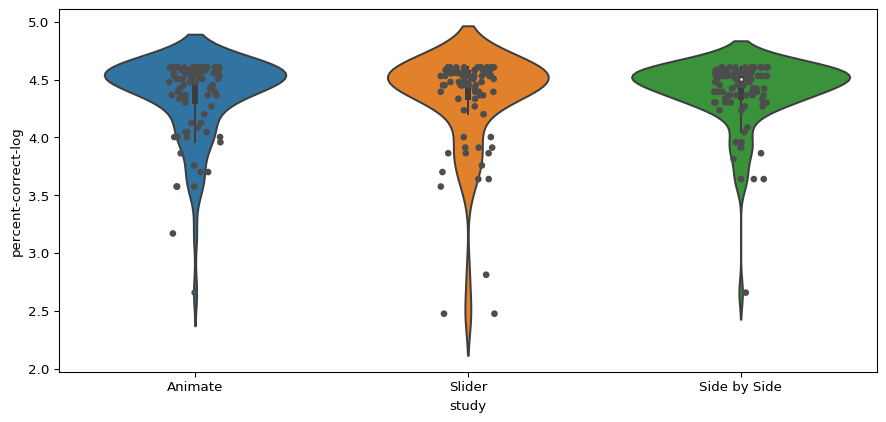

In [16]:
plt.figure(figsize=(11,5), dpi=96)
sns.violinplot(x='study',y='percent-correct-log', data=df)
sns.stripplot(x='study',y='percent-correct-log', color=".3", data=df)

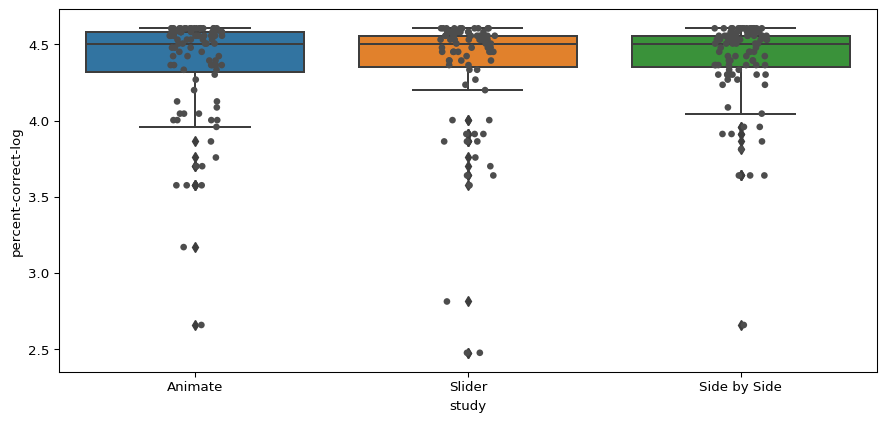

In [17]:
plt.figure(figsize=(11,5), dpi=96)
sns.boxplot(x='study',y='percent-correct-log', data=df)
sns.stripplot(x='study',y='percent-correct-log', color=".3", data=df)

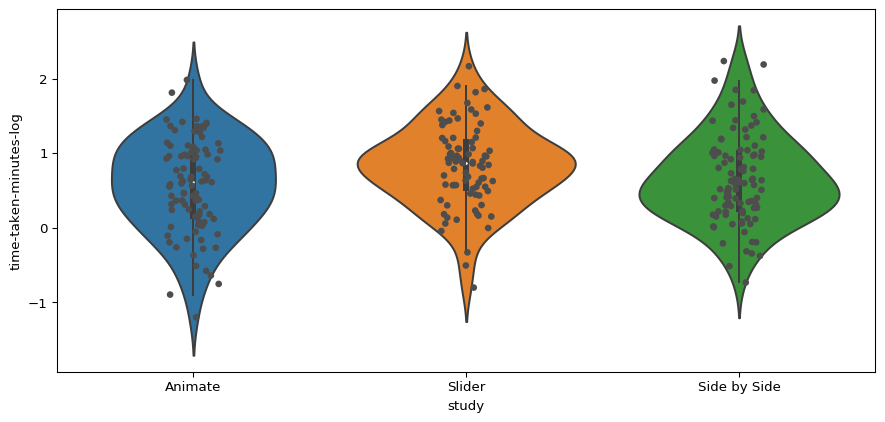

In [18]:
plt.figure(figsize=(11,5), dpi=96)
sns.violinplot(x='study',y='time-taken-minutes-log', data=df)
sns.stripplot(x='study',y='time-taken-minutes-log', color=".3", data=df)

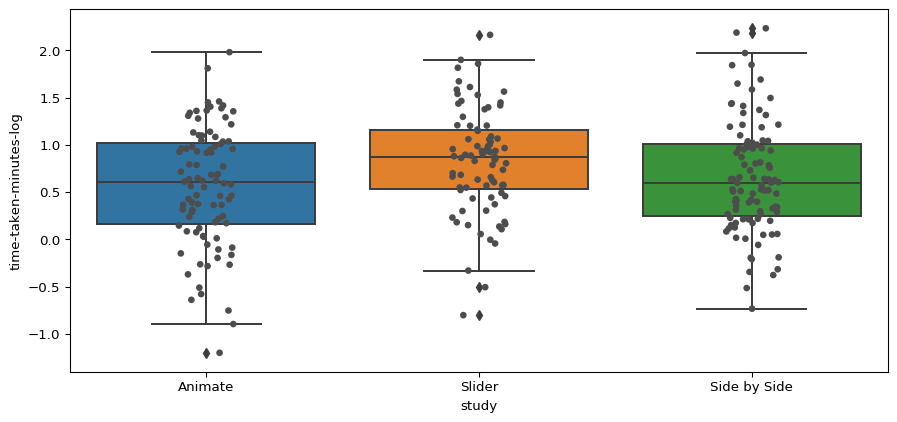

In [19]:
plt.figure(figsize=(11,5), dpi=96)
sns.boxplot(x='study',y='time-taken-minutes-log', data=df)
sns.stripplot(x='study',y='time-taken-minutes-log', color=".3", data=df)

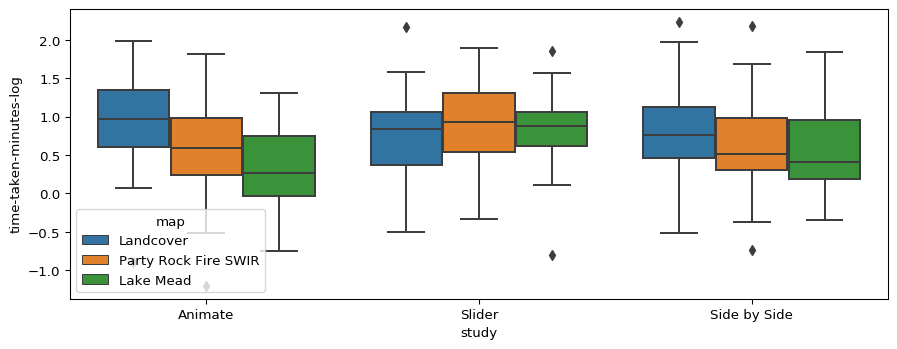

In [20]:
plt.figure(figsize=(11,4), dpi=96)
sns.boxplot(x='study',y='time-taken-minutes-log', hue='map', data=df)


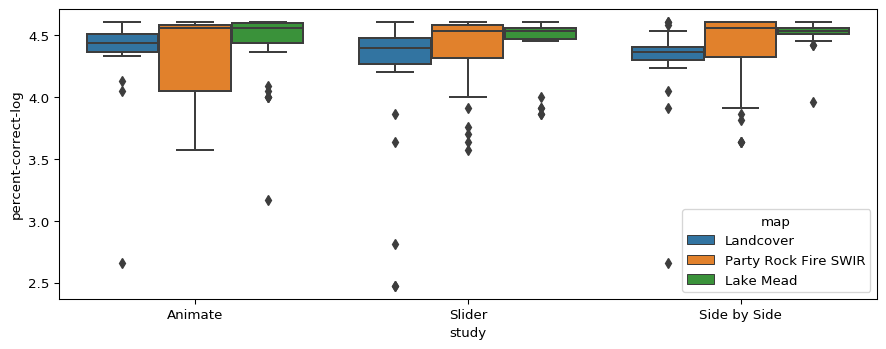

In [21]:
plt.figure(figsize=(11,4), dpi=96)
sns.boxplot(x='study',y='percent-correct-log', hue='map', data=df)


In [22]:
import researchpy as rp
import scipy.stats as stats
import scikit_posthocs as sp
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [23]:
# statdf = df.loc[:, ('study','time-taken-minutes', 'percent-correct')]
# statdf = df[['study', 'time-taken-minutes', 'percent-correct']]
# statdf = statdf.rename(columns={'time-taken-minutes': 'time','percent-correct': 'correct'})
# statdf

statdf = df.loc[:, ('study', 'map', 'time-taken-minutes-log', 'percent-correct-log')]
statdf = df[['study', 'map', 'time-taken-minutes-log', 'percent-correct-log']]
statdf = statdf.rename(columns={'time-taken-minutes-log': 'time', 'percent-correct-log': 'correct'})
statdf

,study,map,time,correct
309,Animate,Landcover,1.364283,4.478418
308,Slider,Party Rock Fire SWIR,1.816842,4.605170
306,Side by Side,Lake Mead,0.961736,4.531062
305,Animate,Landcover,1.339526,4.125597
304,Side by Side,Party Rock Fire SWIR,0.217541,3.958543
...,...,...,...,...
5,Side by Side,Party Rock Fire SWIR,0.506787,4.556380
4,Side by Side,Lake Mead,0.783407,4.605170
3,Animate,Party Rock Fire SWIR,0.592894,4.581073
2,Side by Side,Party Rock Fire SWIR,0.399235,4.581073


In [24]:
statdf['both'] = df[['study', 'map']].agg('-'.join, axis=1) 
rp.summary_cont(statdf['time'].groupby(statdf['both']))

,N,Mean,SD,SE,95% Conf.,Interval
both,,,,,,
Animate-Lake Mead,30,0.316211,0.569171,0.103916,0.109054,0.523368
Animate-Landcover,24,0.878967,0.599911,0.122456,0.633790,1.124144
Animate-Party Rock Fire SWIR,37,0.556739,0.613663,0.100886,0.356276,0.757202
Side by Side-Lake Mead,31,0.547547,0.547551,0.098343,0.351608,0.743485
Side by Side-Landcover,32,0.811982,0.616938,0.109060,0.594803,1.029160
Side by Side-Party Rock Fire SWIR,36,0.596093,0.594630,0.099105,0.399092,0.793094
Slider-Lake Mead,31,0.816525,0.511039,0.091785,0.633652,0.999398
Slider-Landcover,25,0.763960,0.605108,0.121022,0.521866,1.006053
Slider-Party Rock Fire SWIR,27,0.905586,0.554542,0.106722,0.692427,1.118746


In [25]:
# time taken statistics
rp.summary_cont(statdf['time'].groupby(statdf['study']))

,N,Mean,SD,SE,95% Conf.,Interval
study,,,,,,
Animate,91,0.562428,0.627639,0.065794,0.432756,0.692099
Side by Side,99,0.650674,0.592801,0.059579,0.533305,0.768042
Slider,83,0.829664,0.550907,0.060470,0.710422,0.948905


In [26]:
# Accuracy statistics
rp.summary_cont(statdf['correct'].groupby(statdf['study']))

,N,Mean,SD,SE,95% Conf.,Interval
study,,,,,,
Animate,91,4.359031,0.352988,0.037003,4.286103,4.431959
Side by Side,99,4.395511,0.287990,0.028944,4.338492,4.452530
Slider,83,4.329076,0.434285,0.047669,4.235077,4.423075


In [27]:
print('Study and Time')

# Time taken statistics
stats_table = rp.summary_cont(statdf['time'].groupby(statdf['study']))

print('Stats Table')
print(stats_table)
print('')

#one way nova
oneway_table = stats.f_oneway(statdf['time'][statdf['study'] == 'Animate'],
             statdf['time'][statdf['study'] == 'Side by Side'],
             statdf['time'][statdf['study'] == 'Slider'])

print('oneway Table')
print(oneway_table)
print('')

# get ANOVA table — Ordinary Least Squares (OLS) model
# If the P-value (PR(>F)) obtained from ANOVA analysis is (P<0.05), we conclude that there are significant differences among treatments
model = ols('time ~ C(study)', data=statdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('ANOVA Table')
print(anova_table)
print('')
# perform multiple pairwise comparison (Tukey HSD)
# Results from Tukey HSD suggests that except A-C, all other pairwise comparisons for treatments rejects null hypothesis and indicates statistical significant differences.
m_comp = pairwise_tukeyhsd(endog=statdf['time'], groups=statdf['study'], alpha=0.05)
print('Tukey adhoc')
print(m_comp)
print('')
# The Shapiro-Wilk test can be used to check the normal distribution of residuals . Null hypothesis: data is drawn from normal distribution.
# When the P-value is non significant we fail to reject null hypothesis and conclude that data is drawn from normal distribution.
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk test normal distribution of residuals')
print(w, pvalue)
print('')

data = [statdf.loc[ids, 'time'].values for ids in statdf.groupby('study').groups.values()]
H, p = stats.kruskal(*data)
print('kruskal pvalue')
print(p)
print('')

# Pairwise comparisons show that we may reject the null hypothesis (p < 0.01) for each pair of study and conclude that all groups (study) differ in their time taken.
posthoc = sp.posthoc_conover(statdf, val_col='time', group_col='study', p_adjust = 'holm')
print('kruskal posthoc')
print(posthoc)
print('')


#Levene test can be used to check the Homogeneity of variances when the data is not drawn from normal distribution.
# center : {‘mean’, ‘median’, ‘trimmed'}
# Three variations of Levene’s test are possible. The possibilities and their recommended usages are:
# ‘median’ : Recommended for skewed (non-normal) distributions>
# ‘mean’ : Recommended for symmetric, moderate-tailed distributions.
# ‘trimmed’ : Recommended for heavy-tailed distributions.
# p-value of Levene's test is less than some significance level (typically 0.05), 
#    the obtained differences in sample variances are unlikely to have occurred based on random sampling 
#   from a population with equal varian
print('Levene test for equal variances')
levene = stats.levene(statdf['time'][statdf['study'] == 'Animate'],
             statdf['time'][statdf['study'] == 'Side by Side'],
             statdf['time'][statdf['study'] == 'Slider']) 
print(levene)

Study and Time


Stats Table
               N      Mean        SD        SE  95% Conf.  Interval
study                                                              
Animate       91  0.562428  0.627639  0.065794   0.432756  0.692099
Side by Side  99  0.650674  0.592801  0.059579   0.533305  0.768042
Slider        83  0.829664  0.550907  0.060470   0.710422  0.948905

oneway Table
F_onewayResult(statistic=4.553831008918026, pvalue=0.011348036368637283)

ANOVA Table
             sum_sq     df         F    PR(>F)
C(study)   3.197098    2.0  4.553831  0.011348
Residual  94.779164  270.0       NaN       NaN

Tukey adhoc
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj   lower  upper  reject
---------------------------------------------------------------
     Animate Side by Side   0.0882 0.5575 -0.1145  0.291  False
     Animate       Slider   0.2672  0.009  0.0553 0.4792   True
Side by Side       Slider    0.179 0.1071 -0.0288 0.3868 

In [28]:
print('Study and Correctness')

# Correctness taken statistics
stats_table = rp.summary_cont(statdf['correct'].groupby(statdf['study']))

print('Stats Table')
print(stats_table)
print('')

#one way nova
oneway_table = stats.f_oneway(statdf['correct'][statdf['study'] == 'Animate'],
             statdf['correct'][statdf['study'] == 'Side by Side'],
             statdf['correct'][statdf['study'] == 'Slider'])

print('oneway Table')
print(oneway_table)
print('')

# get ANOVA table — Ordinary Least Squares (OLS) model
# If the P-value (PR(>F)) obtained from ANOVA analysis is (P<0.05), we conclude that there are significant differences among treatments
model = ols('correct ~ C(study)', data=statdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('ANOVA Table')
print(anova_table)
print('')
# perform multiple pairwise comparison (Tukey HSD)
# Results from Tukey HSD suggests that except A-C, all other pairwise comparisons for treatments rejects null hypothesis and indicates statistical significant differences.
m_comp = pairwise_tukeyhsd(endog=statdf['correct'], groups=statdf['study'], alpha=0.05)
print('Tukey adhoc')
print(m_comp)
print('')

# The Shapiro-Wilk test can be used to check the normal distribution of residuals . Null hypothesis: data is drawn from normal distribution.
# When the P-value is non significant we fail to reject null hypothesis and conclude that data is drawn from normal distribution.
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk test normal distribution of residuals')
print(w, pvalue)
print('')

# The Shapiro-Wilk test can be used to check the normal distribution of residuals . Null hypothesis: data is drawn from normal distribution.
# When the P-value is non significant we fail to reject null hypothesis and conclude that data is drawn from normal distribution.
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk test normal distribution of residuals')
print(w, pvalue)
print('')

data = [statdf.loc[ids, 'correct'].values for ids in statdf.groupby('study').groups.values()]
H, p = stats.kruskal(*data)
print('kruskal pvalue')
print(p)
print('')

# Pairwise comparisons show that we may reject the null hypothesis (p < 0.01) for each pair of study and conclude that all groups (study) differ in their time taken.
posthoc = sp.posthoc_conover(statdf, val_col='correct', group_col='study', p_adjust = 'holm')
print('kruskal posthoc')
print(posthoc)
print('')

#Levene test can be used to check the Homogeneity of variances when the data is not drawn from normal distribution.
# center : {‘mean’, ‘median’, ‘trimmed'}
# Three variations of Levene’s test are possible. The possibilities and their recommended usages are:
# ‘median’ : Recommended for skewed (non-normal) distributions>
# ‘mean’ : Recommended for symmetric, moderate-tailed distributions.
# ‘trimmed’ : Recommended for heavy-tailed distributions.
# p-value of Levene's test is less than some significance level (typically 0.05), 
#    the obtained differences in sample variances are unlikely to have occurred based on random sampling 
#   from a population with equal varian
print('Levene test for equal variances')
levene = stats.levene(statdf['correct'][statdf['study'] == 'Animate'],
             statdf['correct'][statdf['study'] == 'Side by Side'],
             statdf['correct'][statdf['study'] == 'Slider']) 
print(levene)

Study and Correctness


Stats Table
               N      Mean        SD        SE  95% Conf.  Interval
study                                                              
Animate       91  4.359031  0.352988  0.037003   4.286103  4.431959
Side by Side  99  4.395511  0.287990  0.028944   4.338492  4.452530
Slider        83  4.329076  0.434285  0.047669   4.235077  4.423075

oneway Table
F_onewayResult(statistic=0.7818438251471818, pvalue=0.4585946707033025)

ANOVA Table
             sum_sq     df         F    PR(>F)
C(study)   0.201585    2.0  0.781844  0.458595
Residual  34.807486  270.0       NaN       NaN

Tukey adhoc
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj   lower  upper  reject
---------------------------------------------------------------
     Animate Side by Side   0.0365  0.744 -0.0864 0.1594  False
     Animate       Slider    -0.03 0.8298 -0.1584 0.0985  False
Side by Side       Slider  -0.0664 0.4306 -0.1924 0

In [29]:
m_comp = pairwise_tukeyhsd(endog=statdf['time'], groups=statdf['study'], alpha=0.05)
print('Tukey adhoc')
print(m_comp)
print('')

Tukey adhoc
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj   lower  upper  reject
---------------------------------------------------------------
     Animate Side by Side   0.0882 0.5575 -0.1145  0.291  False
     Animate       Slider   0.2672  0.009  0.0553 0.4792   True
Side by Side       Slider    0.179 0.1071 -0.0288 0.3868  False
---------------------------------------------------------------



<Figure size 1248x480 with 0 Axes>

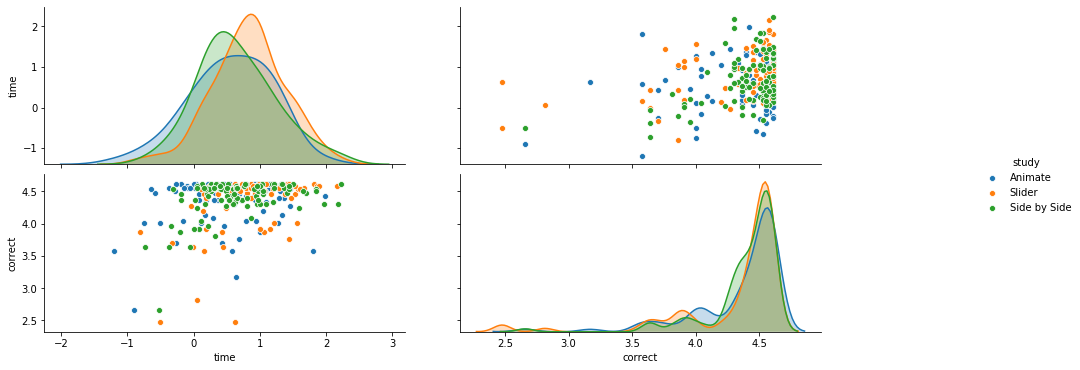

In [30]:
plt.figure(figsize=(13,5), dpi=96)
g = sns.pairplot(statdf, hue="study")
g.fig.set_figheight(5)
g.fig.set_figwidth(16)
g      

<Figure size 1248x480 with 0 Axes>

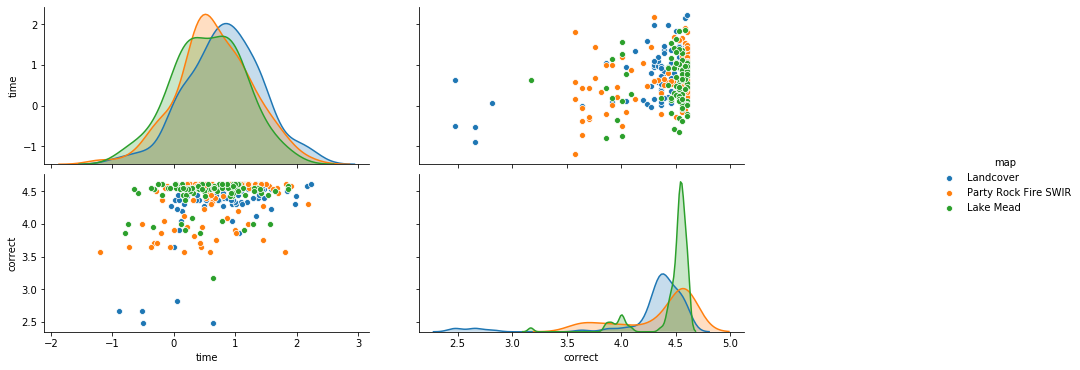

In [31]:
plt.figure(figsize=(13,5), dpi=96)
g = sns.pairplot(statdf, hue="map")
g.fig.set_figheight(5)
g.fig.set_figwidth(16)
g    

<Figure size 1248x480 with 0 Axes>

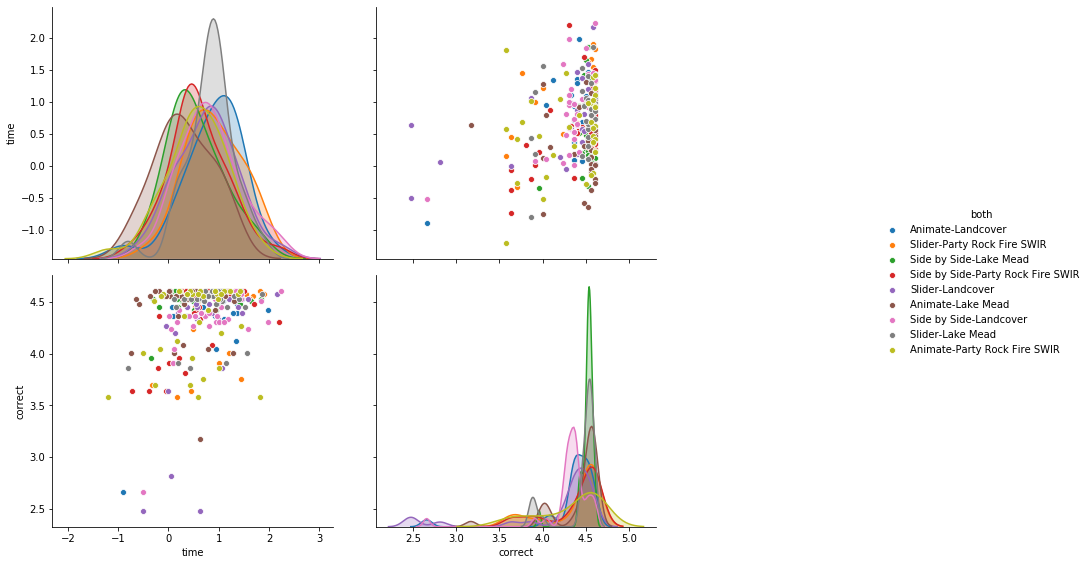

In [32]:
plt.figure(figsize=(13,5), dpi=96)
g = sns.pairplot(statdf, hue="both")
g.fig.set_figheight(8)
g.fig.set_figwidth(16)
g

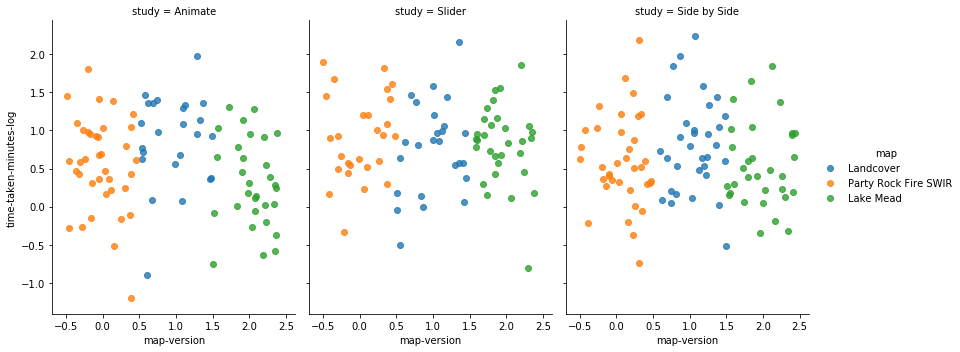

In [33]:
g = sns.lmplot(x="map-version", y="time-taken-minutes-log", hue="map", col="study",
               data=df, height=5, aspect=.77, x_jitter=.5)

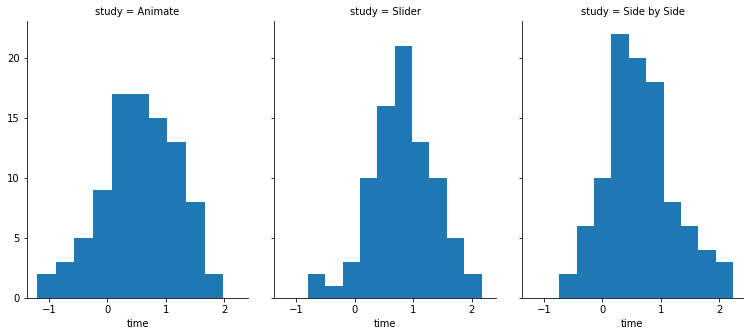

In [34]:
g = sns.FacetGrid(statdf, col="study", height=4, aspect=.5)
g = g.map(plt.hist, "time")
g.fig.set_figheight(5)
g.fig.set_figwidth(11)
g

In [35]:
df.to_csv('data/cleaned_normalized_data-gridonly2.csv')
